In [1]:
#1 IMPORTING LIBRARIES
import math
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from scipy import stats
%matplotlib inline

# Data Cleaning

In [2]:
#2 READING DATA
dataset = pd.read_csv('StartupData.csv')
df = pd.DataFrame(dataset)
#df

In [3]:
#3 FIXING NUMBER OF CO-FOUNDERS COLUMN VALUES
for i in range( len(df["Number of Co-founders"]) ):
    if (df["Number of Co-founders"][i] == 0):
        df.at[i,"Number of Co-founders"] = 1

In [4]:
#4 FIXING NO-INFO DATA TO NAN FOR USABILITY
for col in df:
    for i in range( len(df[col]) ):
        if (type(df[col][i])) == str:
            if df[col][i] == "No Info":
                df.at[i,col] = np.NaN

In [5]:
'''OPTIONAL debugging'''
#STIMULUS CHECK FOR NO INFO VALUES.
for col in df:
    for i in range( len(df[col]) ):
        if (type(df[col][i])) == str:
            if df[col][i] == "No Info":
                print(i, col)

In [12]:
#REGRESSION.

In [6]:
#5 SELECTING NUMERICAL COLUMNS
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = df.select_dtypes(include=numerics)
# newdf

In [7]:
#6 ADDING Y COLUMN TO NEWDF
temp = df["Dependent-Company Status"]
newdf["Dependent-Company Status"] = temp
# newdf

D:\Users\Nymeria\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
#7 FILLING NAN WITH MEDIAN
newdf = newdf.fillna(df.median())
# newdf

In [9]:
#8 REPLACING ALL SUCCESS WITH 1 AND ALL FAILURE WITH 0
newdf["Dependent-Company Status"] = newdf["Dependent-Company Status"].replace({"Failed": 0, "Success": 1})
# newdf

# Logistic Regression

In [17]:
#SMOTE

In [18]:
# !pip3 install -U imbalanced-learn

In [10]:
#9 IMPLEMENTING SMOTE TO RESOLVE IMBALANCE

data_final = newdf

X = data_final.loc[:, data_final.columns != "Dependent-Company Status"]
y = data_final.loc[:, data_final.columns == "Dependent-Company Status"]

from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=["Dependent-Company Status"])

print("size of oversampled data:",len(os_data_X))
print("number of failures in data:",len(os_data_y[os_data_y["Dependent-Company Status"]==0]))
print("number of successes:",len(os_data_y[os_data_y["Dependent-Company Status"]==1]))
print("failure proportion:",len(os_data_y[os_data_y["Dependent-Company Status"]==0])/len(os_data_X))
print("success proportion:",len(os_data_y[os_data_y["Dependent-Company Status"]==1])/len(os_data_X))

size of oversampled data: 428
number of failures in data: 214
number of successes: 214
failure proportion: 0.5
success proportion: 0.5


In [11]:
#10 RFE TO CHECK FEATURE SELECTION
data_final_vars=data_final.columns.values.tolist()
y=["Dependent-Company Status"]
X=[i for i in data_final_vars if i not in y]

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

D:\Users\Nymeria\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[ True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1]


In [12]:
#11 SETTING TARGETS
cols=["Internet Activity Score", "Employee Count", "Employees count MoM change", "Last Funding Amount", "Number of Co-founders", "Number of of advisors", "Team size Senior leadership", "Industry trend in investing"]
X=os_data_X[cols]
y=os_data_y["Dependent-Company Status"]

In [13]:
# EXPORTING INTERMEDIATE CLEAN DATA
import pickle
X_file = open('X_clean','wb')
y_file = open('y_clean','wb')
pickle.dump(X,X_file)
pickle.dump(y,y_file)
X_file.close()
y_file.close()

In [22]:
#IMPLEMENTING THE MODEL

In [14]:
#12
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.528488
         Iterations 6
                              Results: Logit
Model:                Logit                    Pseudo R-squared: 0.238     
Dependent Variable:   Dependent-Company Status AIC:              468.3860  
Date:                 2020-11-30 17:34         BIC:              500.8590  
No. Observations:     428                      Log-Likelihood:   -226.19   
Df Model:             7                        LL-Null:          -296.67   
Df Residuals:         420                      LLR p-value:      3.2173e-27
Converged:            1.0000                   Scale:            1.0000    
No. Iterations:       6.0000                                               
---------------------------------------------------------------------------
                             Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------------
Internet Activity

In [24]:
#MODEL FITTING

In [15]:
#13
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [26]:
#PREDICTING ACCURACY

In [16]:
#14
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.64


In [28]:
#CONFUSION MATRIX

In [17]:
#15
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[31 32]
 [14 52]]


In [30]:
#COMPUTING METRICS

In [18]:
#16
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.49      0.57        63
           1       0.62      0.79      0.69        66

    accuracy                           0.64       129
   macro avg       0.65      0.64      0.63       129
weighted avg       0.65      0.64      0.64       129



In [32]:
#ROC CURVE

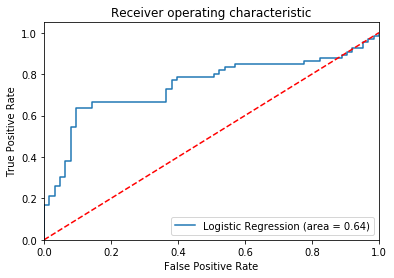

In [19]:
#17
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [20]:
#18
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import sklearn as sk

In [21]:
#19
def get_metrics(y_test,y_pred):
    print("Accuracy",accuracy_score(y_test,y_pred))
    print("Success Precision: ",precision_score(y_test,y_pred,pos_label=1))
    print("Failed Precision: ",precision_score(y_test,y_pred,pos_label=0))
    print("Success Recall: ",recall_score(y_test,y_pred))
    print("Failed Recall: ",recall_score(y_test,y_pred,pos_label=0))
    print("Confusion Matrix: \n",sk.metrics.confusion_matrix(y_test,y_pred))

In [22]:
#20
get_metrics(y_test,y_pred)

Accuracy 0.6434108527131783
Success Precision:  0.6190476190476191
Failed Precision:  0.6888888888888889
Success Recall:  0.7878787878787878
Failed Recall:  0.49206349206349204
Confusion Matrix: 
 [[31 32]
 [14 52]]
